In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### Data Dictionary:
- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard Titanic
- parch: # of parents / children aboard Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values present in the dataset.

We can see that Age value is missing for many rows.

Out of 891 rows, the Age value is present only in 714 rows, which means around 20% data is missing.

Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have Cabin values. i.e. only around 20% data is available for cabin.

In [7]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##### Since, PassengerId, Name and Ticket does not affect to predict the survival. Therefore we will delete these columns.

- We will also delete the Cabin column, as there are too many missing values present in the dataset.

In [8]:
df = df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.shape

(891, 8)

<AxesSubplot:xlabel='Survived', ylabel='count'>

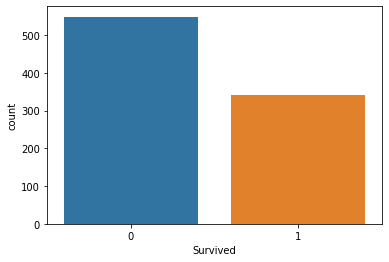

In [10]:
sns.countplot(df['Survived'])

##### Bar Chart for Categorical Features:
1. Sex
2. Pclass
3. SibSp ( # of siblings and spouse)
4. Parch ( # of parents and children)
5. Embarked
6. Cabin

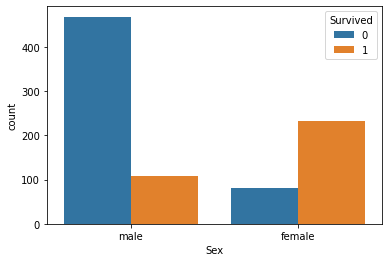

In [11]:
sns.countplot(x = 'Sex',data = df,hue = 'Survived')
plt.show()

Observation: The chart confirms that Women are more likely to survive than Men.

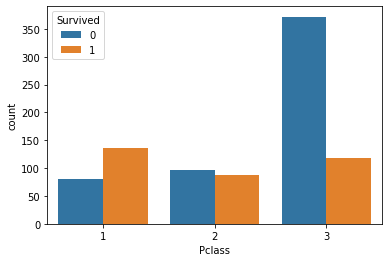

In [12]:
sns.countplot(x = 'Pclass',data = df,hue = 'Survived')
plt.show()

Observation: 
- The Chart confirms 1st class more likely survived than other classes
- The Chart confirms 3rd class more likely dead than other classes

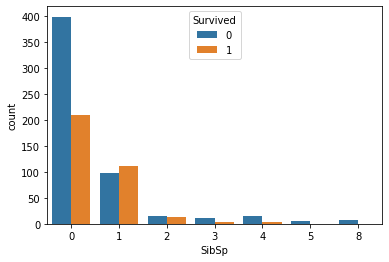

In [13]:
sns.countplot(x = 'SibSp',data = df,hue = 'Survived')
plt.show()

The Chart confirms that a person aboarded without siblings or spouse is more likely dead.

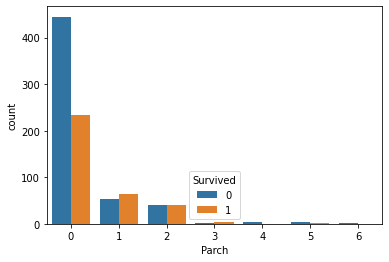

In [14]:
sns.countplot(x = 'Parch',data = df,hue = 'Survived')
plt.show()

The Chart confirms that a person aboarded alone is more likely dead

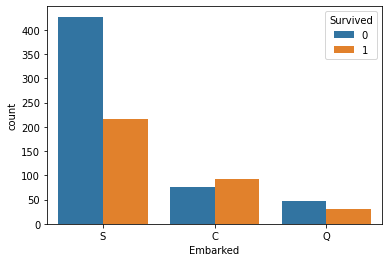

In [15]:
sns.countplot(x = 'Embarked',data = df,hue = 'Survived')
plt.show()

- The Chart confirms that a person aboarded from C is slightly more likely survived
- The Chart confirms that a person aboarded from Q is more likely dead
- The Chart confirms that a person aboarded from S is more likely dead

But this does not make any sense, i.e. Boarding Point should not affect the possibility of survival.

In [16]:
df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [17]:
df[['Embarked', 'Pclass']].groupby('Embarked').mean().sort_values(by='Pclass', ascending=False)

,Pclass
Embarked,
Q,2.909091
S,2.350932
C,1.886905


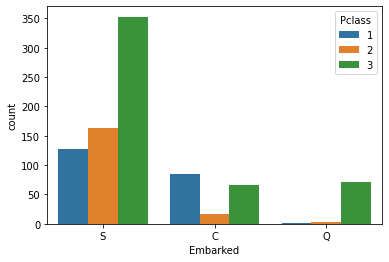

In [18]:
sns.countplot(x = 'Embarked',data = df,hue = 'Pclass')
plt.show()

We can see that people from Cherbourg were more settled in the Class 1. This can be an explanation.

In [19]:
title_mapping = {"male": 1, "female": 0}
df_ = df.copy()
df_['Sex'] = df_['Sex'].map(title_mapping)
print(df_[['Embarked', 'Sex']].groupby('Embarked').mean().sort_values(by='Sex', ascending=False))
del(df_)

               Sex
Embarked          
S         0.684783
C         0.565476
Q         0.532468


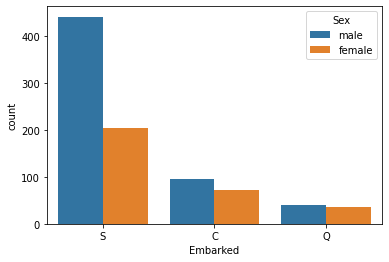

In [20]:
sns.countplot(x = 'Embarked',data = df,hue = 'Sex')
plt.show()

The low survival of S can be explained by the high-rate of men.

##### Numerical Features
1. Age
2. Fare

<AxesSubplot:xlabel='Age', ylabel='Density'>

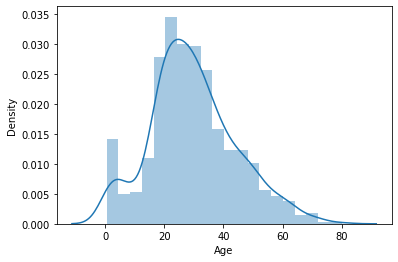

In [21]:
sns.distplot(df.Age.dropna())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

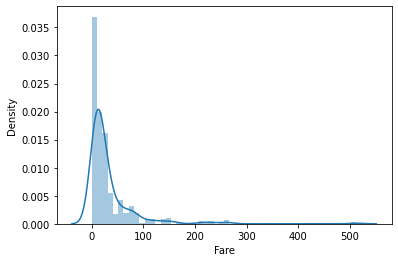

In [22]:
sns.distplot(df.Fare)

The Distribution of Fare is highly skewed. We will remove skewness from the data before processing.

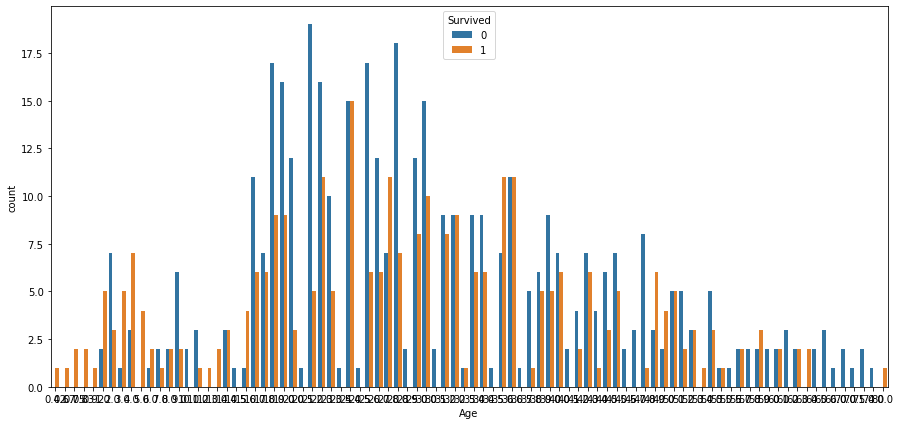

In [23]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'Age',data = df,hue = 'Survived')
plt.show()

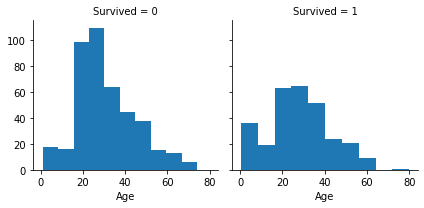

In [24]:
num = sns.FacetGrid(df, col='Survived')
print(num.map(plt.hist, 'Age'))

Observation:
- Younger and older people survived.
- The middle age (20-40) people did not survive.
- We should consider the age as predicator.

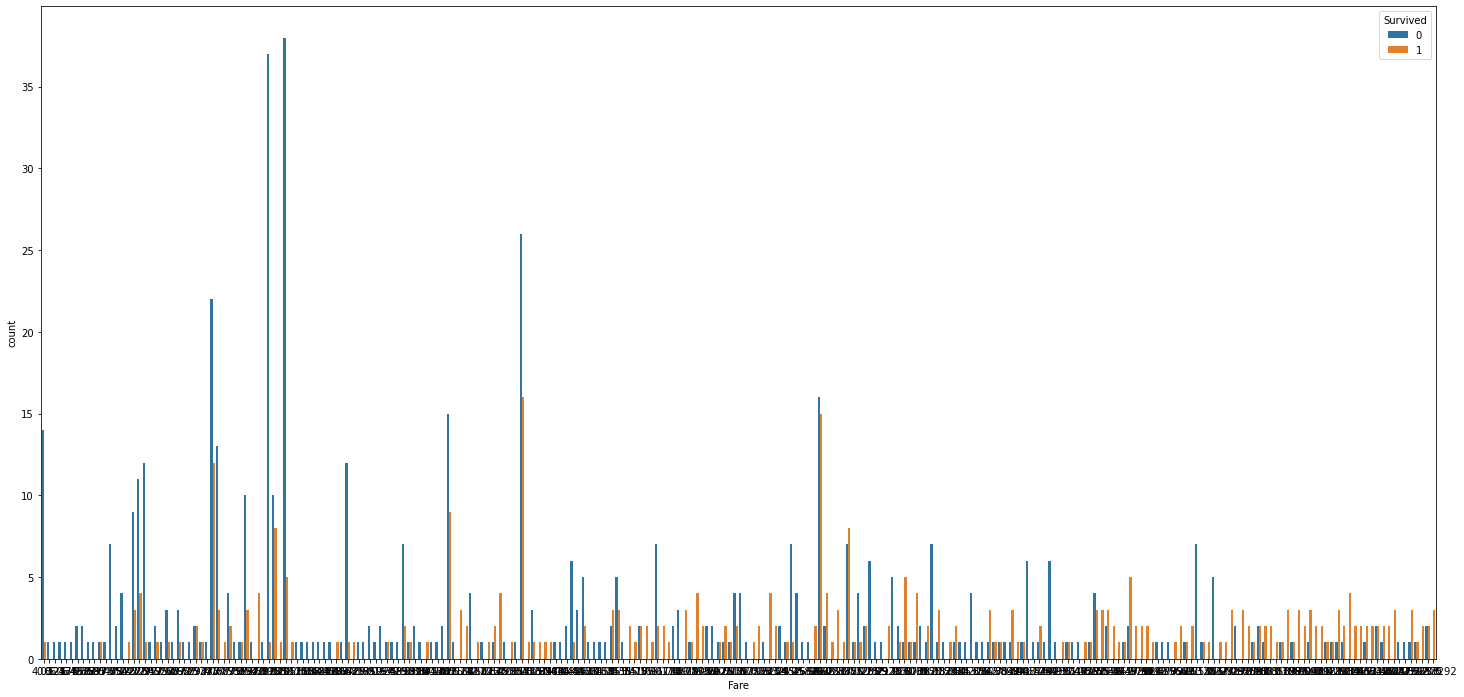

In [25]:
plt.figure(figsize = (25,12))
sns.countplot(x = 'Fare',data = df,hue = 'Survived')
plt.show()

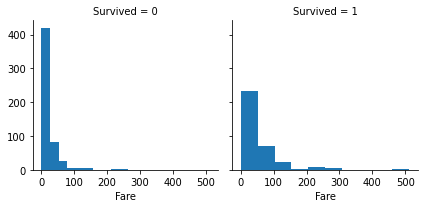

In [26]:
num = sns.FacetGrid(df, col='Survived')
print(num.map(plt.hist, 'Fare'))

There is nothing much clear from Fare Plot.

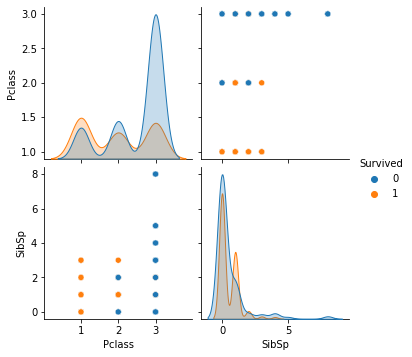

In [27]:
sns.pairplot(data = df, hue = 'Survived', vars = ['Pclass','SibSp'])

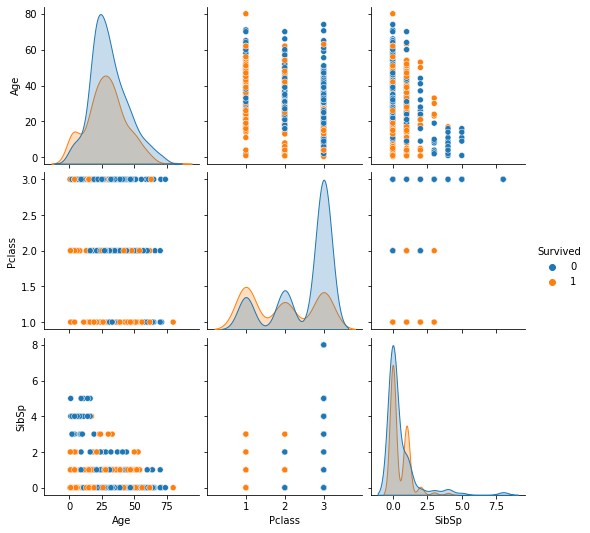

In [28]:
sns.pairplot(data = df, hue = 'Survived', vars = ['Age','Pclass','SibSp'])

<AxesSubplot:>

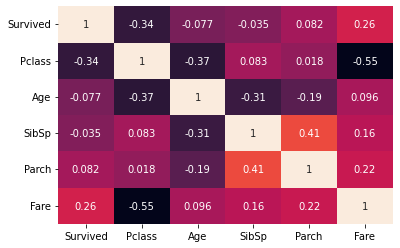

In [29]:
corr = df.corr()
sns.heatmap(corr, cbar = False, annot = True)

- Age has a negative correlation with Pclass
- Fare has a negative correlation with Pclass
- Age has a negative correlation with SibSp and Parch

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

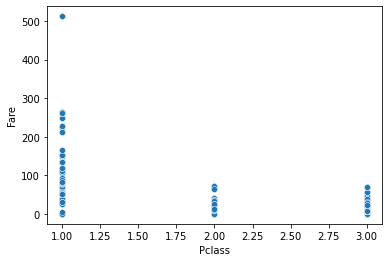

In [30]:
sns.scatterplot(x = 'Pclass', y = 'Fare', data = df )

Pclass 1 corresponds to higher fares while Pclass 2 and 3 coressponds to lower fares

Embarked has two missing values. Let's fill those with modal value which is Southampton (S)

In [31]:
df['Embarked'] = df['Embarked'].fillna('S')

In [32]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

##### Processing the Age

We have seen in the first part that the Age variable was missing 177 values. This is a large number ( ~ 13% of the dataset). Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

Let's group our dataset by sex and passenger class and visualize the relationships between them.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

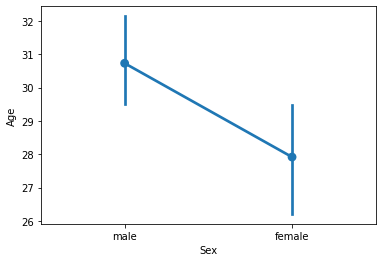

In [33]:
sns.pointplot(x = 'Sex', y = 'Age', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

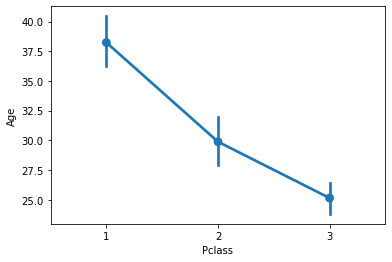

In [34]:
sns.pointplot(x = 'Pclass', y = 'Age', data = df)

Let us find the median by groupping Pclass and Sex.

In [35]:
x = df.groupby(['Pclass','Sex']).median()
grouped_median = x['Age'].reset_index()
grouped_median

,Pclass,Sex,Age
0,1,female,35.0
1,1,male,40.0
2,2,female,28.0
3,2,male,30.0
4,3,female,21.5
5,3,male,25.0


This dataframe will help us impute missing age values based on different criteria.

For example:

If the passenger is female, from Pclass 1, the median age is 35.
If the passenger is male, from Pclass 3, the median age is 25.

Therefore we will use Iterative Imputation for imputing of age.

But for that, first we need to convert categorical data into numerical data.

### Encoding Categorical Values

In [36]:
x = pd.get_dummies(df['Sex'],drop_first = True)
df = pd.concat([df,x],axis = 1)
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix = 'Embarked')],axis = 1)

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


In [38]:
df.shape

(891, 12)

In [39]:
df.drop(['Sex'], axis = 1,inplace = True)
df.drop(['Embarked'], axis = 1,inplace = True)

In [40]:
from sklearn.impute import KNNImputer

knnimp = KNNImputer(n_neighbors = 3)

knn_imp = pd.DataFrame(knnimp.fit_transform(df[['Pclass','male','Age']]), columns = ['Pclass_1','male_1', 'Age_1'])

knn_imp

,Pclass_1,male_1,Age_1
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,19.0
889,1.0,1.0,26.0


In [41]:
df = pd.concat([df,knn_imp],axis = 1)

In [42]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,male_1,Age_1
0,0,3,22.0,1,0,7.2500,1,0,0,1,3.0,1.0,22.0
1,1,1,38.0,1,0,71.2833,0,1,0,0,1.0,0.0,38.0
2,1,3,26.0,0,0,7.9250,0,0,0,1,3.0,0.0,26.0
3,1,1,35.0,1,0,53.1000,0,0,0,1,1.0,0.0,35.0
4,0,3,35.0,0,0,8.0500,1,0,0,1,3.0,1.0,35.0


In [43]:
df.drop(['Pclass_1'], axis = 1,inplace = True)
df.drop(['male_1'], axis = 1,inplace = True)
df.drop(['Age'], axis = 1,inplace = True)

In [44]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Embarked_C,Embarked_Q,Embarked_S,Age_1
0,0,3,1,0,7.2500,1,0,0,1,22.0
1,1,1,1,0,71.2833,0,1,0,0,38.0
2,1,3,0,0,7.9250,0,0,0,1,26.0
3,1,1,1,0,53.1000,0,0,0,1,35.0
4,0,3,0,0,8.0500,1,0,0,1,35.0


In [45]:
df.isnull().sum()

Survived      0
Pclass        0
SibSp         0
Parch         0
Fare          0
male          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Age_1         0
dtype: int64

In [46]:
df.rename(columns = {'Age_1':'Age'}, inplace = True)

df.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Embarked_C,Embarked_Q,Embarked_S,Age
0,0,3,1,0,7.2500,1,0,0,1,22.0
1,1,1,1,0,71.2833,0,1,0,0,38.0
2,1,3,0,0,7.9250,0,0,0,1,26.0
3,1,1,1,0,53.1000,0,0,0,1,35.0
4,0,3,0,0,8.0500,1,0,0,1,35.0


In [47]:
x = df.drop(columns = 'Survived')
y = df.Survived

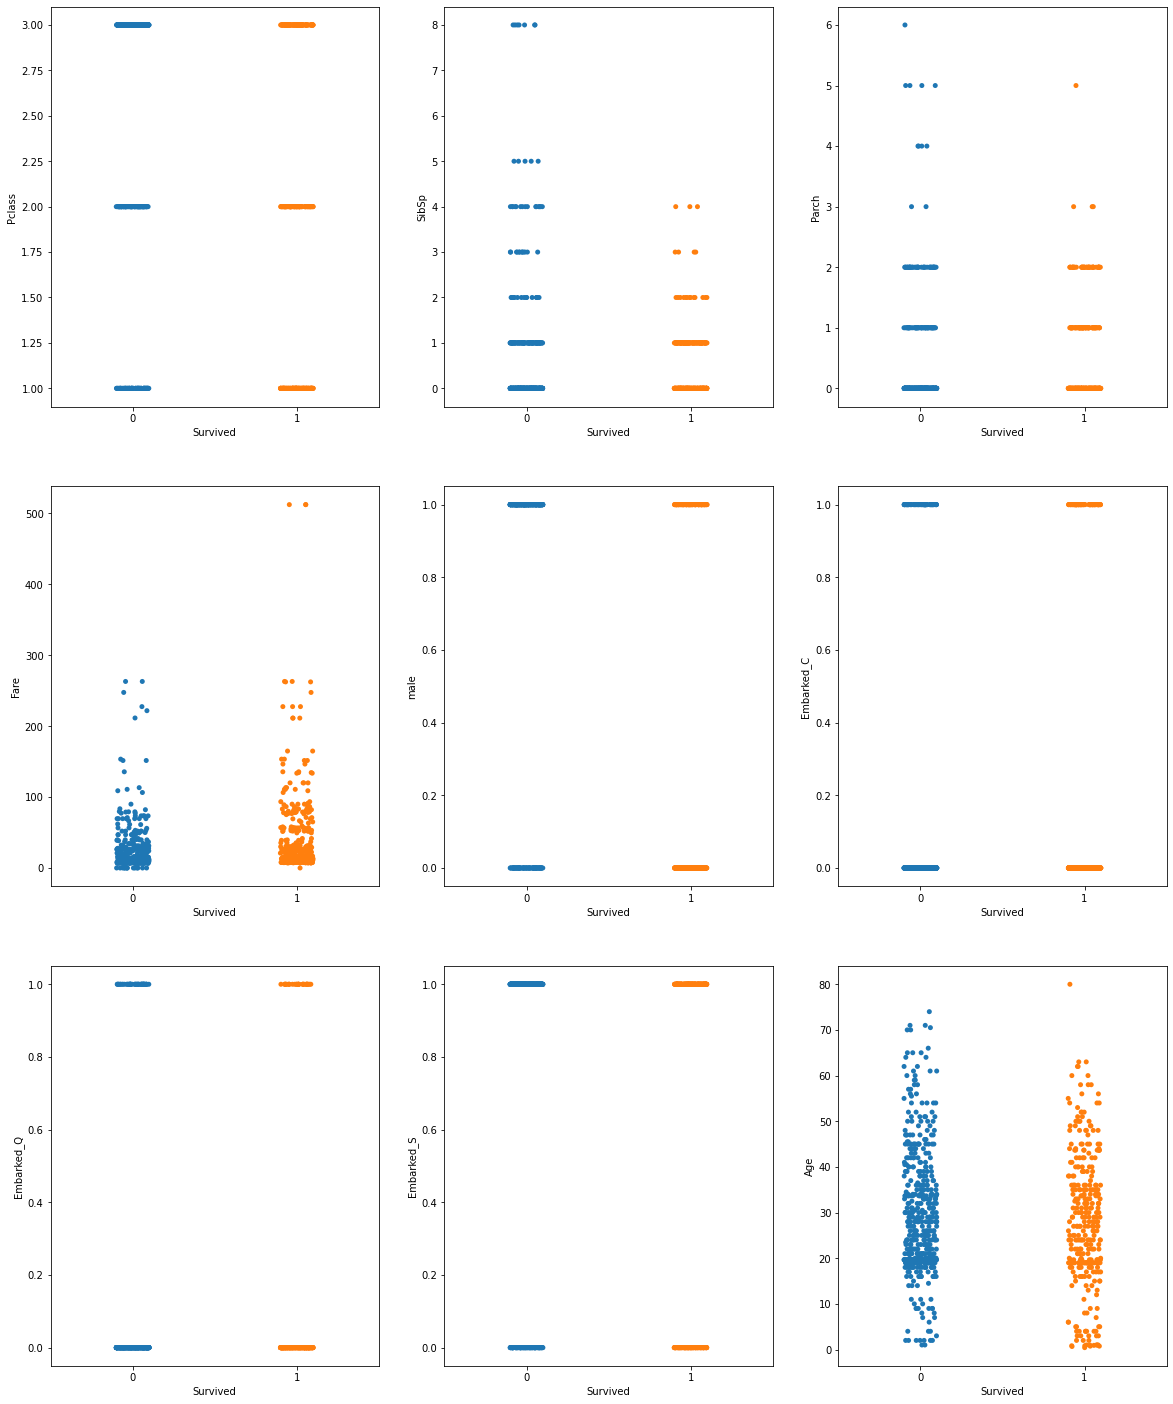

In [48]:
plt.figure(figsize=(20,25))
fignumber = 1

for column in x:
    if fignumber <= 9:
        ax = plt.subplot(3,3,fignumber)
        sns.stripplot(y,x[column])
        
    fignumber +=1
plt.show()

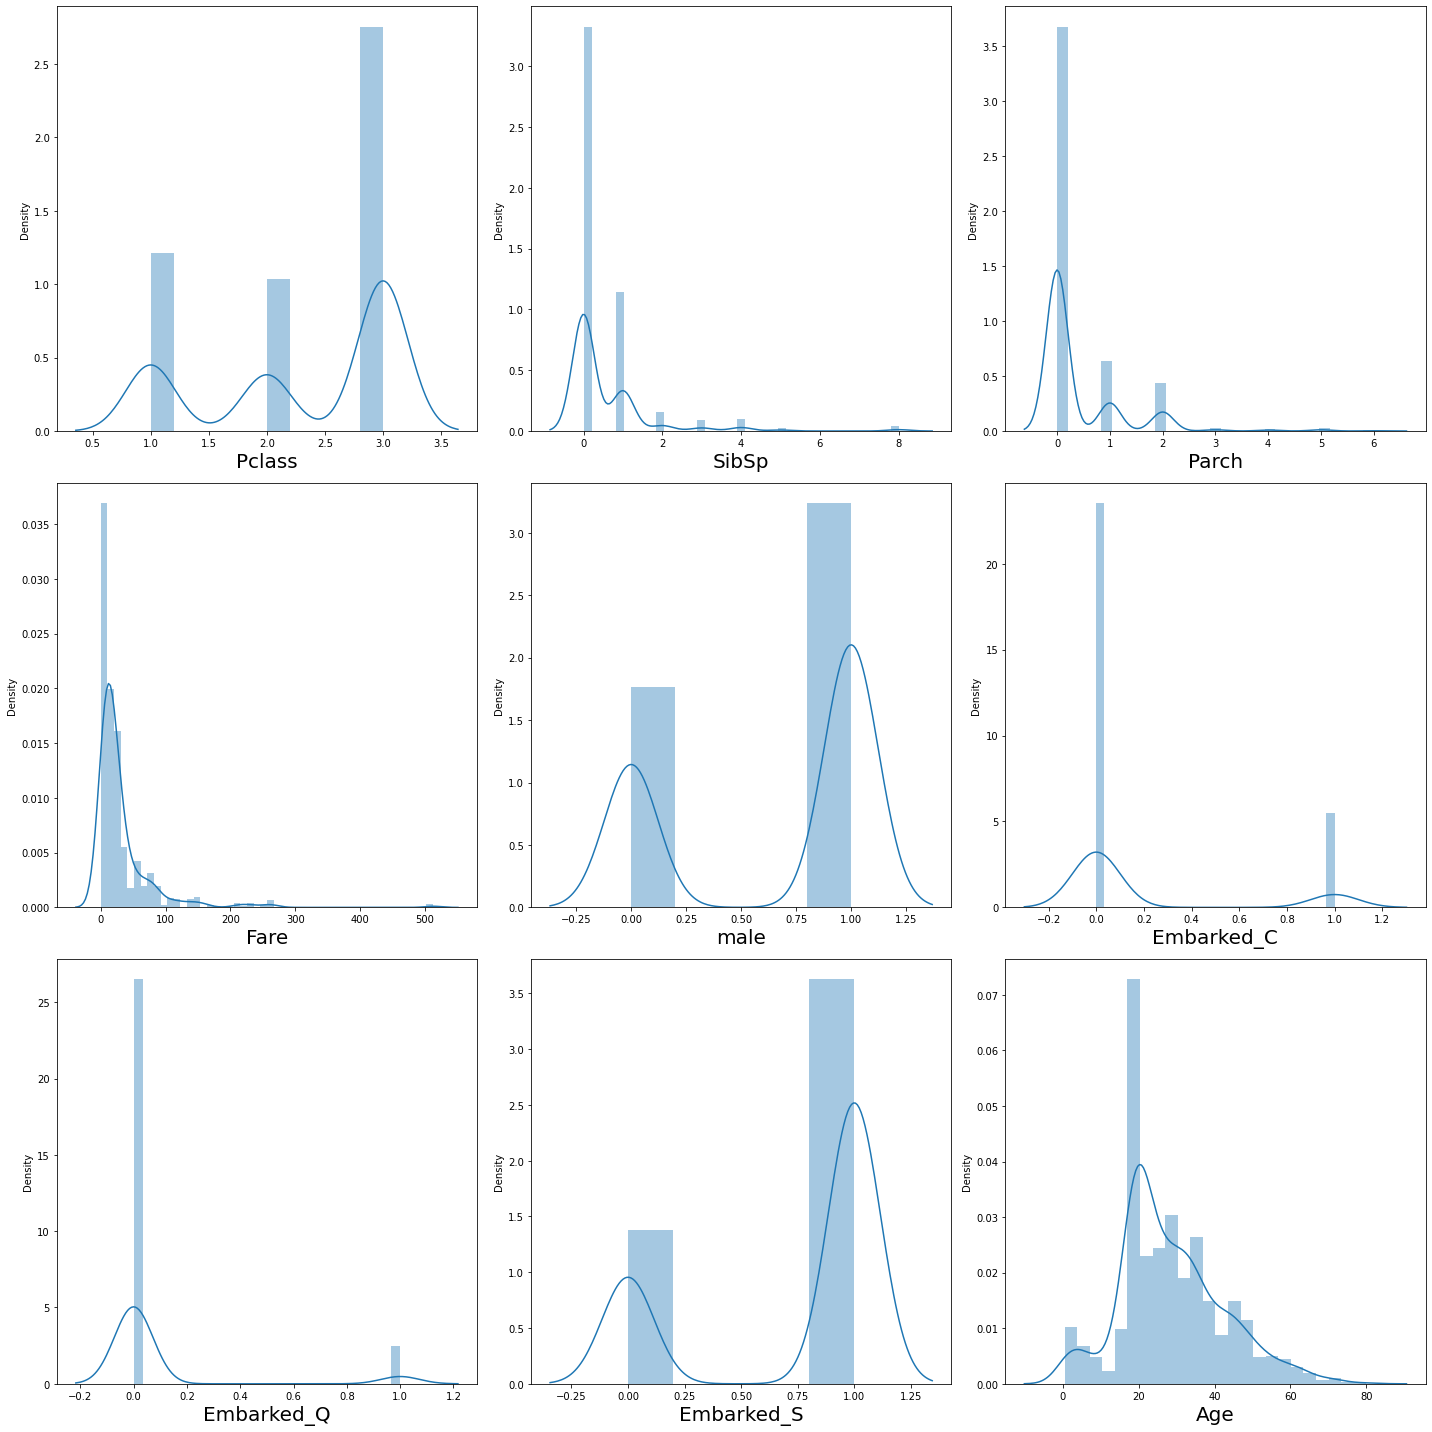

In [49]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.902352,Pclass
1,1.292438,SibSp
2,1.329624,Parch
3,1.652541,Fare
4,1.123776,male
5,inf,Embarked_C
6,inf,Embarked_Q
7,inf,Embarked_S
8,1.350250,Age


As the VIF values represent, there is no multicollinearity in the Dataset.

In [52]:
# Finding the Best Random State
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('accuracy score', acc, 'random_state', i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy score', maxAccu, 'random_state', i)

accuracy score 0.8116591928251121 random_state 1
accuracy score 0.8116591928251121 random_state 1
accuracy score 0.8026905829596412 random_state 2
accuracy score 0.7668161434977578 random_state 3
accuracy score 0.820627802690583 random_state 4
accuracy score 0.820627802690583 random_state 4
accuracy score 0.8340807174887892 random_state 5
accuracy score 0.8340807174887892 random_state 5
accuracy score 0.8609865470852018 random_state 6
accuracy score 0.8609865470852018 random_state 6
accuracy score 0.7533632286995515 random_state 7
accuracy score 0.7937219730941704 random_state 8
accuracy score 0.7892376681614349 random_state 9
accuracy score 0.8251121076233184 random_state 10
accuracy score 0.8654708520179372 random_state 11
accuracy score 0.8654708520179372 random_state 11
accuracy score 0.8251121076233184 random_state 12
accuracy score 0.8071748878923767 random_state 13
accuracy score 0.820627802690583 random_state 14
accuracy score 0.8026905829596412 random_state 15
accuracy score 0

accuracy score 0.8251121076233184 random_state 169
accuracy score 0.7757847533632287 random_state 170
accuracy score 0.7982062780269058 random_state 171
accuracy score 0.8161434977578476 random_state 172
accuracy score 0.8116591928251121 random_state 173
accuracy score 0.7892376681614349 random_state 174
accuracy score 0.7937219730941704 random_state 175
accuracy score 0.7443946188340808 random_state 176
accuracy score 0.7982062780269058 random_state 177
accuracy score 0.7937219730941704 random_state 178
accuracy score 0.7713004484304933 random_state 179
accuracy score 0.820627802690583 random_state 180
accuracy score 0.7757847533632287 random_state 181
accuracy score 0.8071748878923767 random_state 182
accuracy score 0.8071748878923767 random_state 183
accuracy score 0.820627802690583 random_state 184
accuracy score 0.7713004484304933 random_state 185
accuracy score 0.7892376681614349 random_state 186
accuracy score 0.7668161434977578 random_state 187
accuracy score 0.7892376681614349

accuracy score 0.8251121076233184 random_state 341
accuracy score 0.7443946188340808 random_state 342
accuracy score 0.7892376681614349 random_state 343
accuracy score 0.7847533632286996 random_state 344
accuracy score 0.7982062780269058 random_state 345
accuracy score 0.7623318385650224 random_state 346
accuracy score 0.8116591928251121 random_state 347
accuracy score 0.7713004484304933 random_state 348
accuracy score 0.7713004484304933 random_state 349
accuracy score 0.7892376681614349 random_state 350
accuracy score 0.7847533632286996 random_state 351
accuracy score 0.7623318385650224 random_state 352
accuracy score 0.7937219730941704 random_state 353
accuracy score 0.7668161434977578 random_state 354
accuracy score 0.7757847533632287 random_state 355
accuracy score 0.8116591928251121 random_state 356
accuracy score 0.8161434977578476 random_state 357
accuracy score 0.8071748878923767 random_state 358
accuracy score 0.7533632286995515 random_state 359
accuracy score 0.79372197309417

accuracy score 0.8295964125560538 random_state 511
accuracy score 0.8071748878923767 random_state 512
accuracy score 0.820627802690583 random_state 513
accuracy score 0.7892376681614349 random_state 514
accuracy score 0.7399103139013453 random_state 515
accuracy score 0.8026905829596412 random_state 516
accuracy score 0.8116591928251121 random_state 517
accuracy score 0.8071748878923767 random_state 518
accuracy score 0.820627802690583 random_state 519
accuracy score 0.7892376681614349 random_state 520
accuracy score 0.7802690582959642 random_state 521
accuracy score 0.7757847533632287 random_state 522
accuracy score 0.8071748878923767 random_state 523
accuracy score 0.8475336322869955 random_state 524
accuracy score 0.8385650224215246 random_state 525
accuracy score 0.8161434977578476 random_state 526
accuracy score 0.7937219730941704 random_state 527
accuracy score 0.7937219730941704 random_state 528
accuracy score 0.8071748878923767 random_state 529
accuracy score 0.7892376681614349

accuracy score 0.8026905829596412 random_state 685
accuracy score 0.7847533632286996 random_state 686
accuracy score 0.7713004484304933 random_state 687
accuracy score 0.8026905829596412 random_state 688
accuracy score 0.757847533632287 random_state 689
accuracy score 0.8340807174887892 random_state 690
accuracy score 0.7892376681614349 random_state 691
accuracy score 0.7937219730941704 random_state 692
accuracy score 0.8340807174887892 random_state 693
accuracy score 0.7892376681614349 random_state 694
accuracy score 0.7399103139013453 random_state 695
accuracy score 0.7802690582959642 random_state 696
accuracy score 0.7892376681614349 random_state 697
accuracy score 0.8026905829596412 random_state 698
accuracy score 0.7757847533632287 random_state 699
accuracy score 0.8161434977578476 random_state 700
accuracy score 0.8475336322869955 random_state 701
accuracy score 0.8071748878923767 random_state 702
accuracy score 0.7757847533632287 random_state 703
accuracy score 0.766816143497757

accuracy score 0.8251121076233184 random_state 859
accuracy score 0.8071748878923767 random_state 860
accuracy score 0.7892376681614349 random_state 861
accuracy score 0.7982062780269058 random_state 862
accuracy score 0.8116591928251121 random_state 863
accuracy score 0.8475336322869955 random_state 864
accuracy score 0.8026905829596412 random_state 865
accuracy score 0.7847533632286996 random_state 866
accuracy score 0.8295964125560538 random_state 867
accuracy score 0.8251121076233184 random_state 868
accuracy score 0.8116591928251121 random_state 869
accuracy score 0.8161434977578476 random_state 870
accuracy score 0.8026905829596412 random_state 871
accuracy score 0.7623318385650224 random_state 872
accuracy score 0.8161434977578476 random_state 873
accuracy score 0.8071748878923767 random_state 874
accuracy score 0.7847533632286996 random_state 875
accuracy score 0.8475336322869955 random_state 876
accuracy score 0.757847533632287 random_state 877
accuracy score 0.793721973094170

In [53]:
print('Best Accuracy is', maxAccu, 'on Random_state', maxRS)

Best Accuracy is 0.8923766816143498 on Random_state 590


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 590)

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 9)
(668,)
(223, 9)
(223,)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [57]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8923766816143498
[[119  10]
 [ 14  80]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       129
           1       0.89      0.85      0.87        94

    accuracy                           0.89       223
   macro avg       0.89      0.89      0.89       223
weighted avg       0.89      0.89      0.89       223



In [58]:
from sklearn.model_selection import cross_val_score

acc = accuracy_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(reg, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc*100)

At CV: 2
Cross Validation Score is:  79.12480475638634
Accuracy Score is :  89.23766816143498
At CV: 3
Cross Validation Score is:  79.68574635241302
Accuracy Score is :  89.23766816143498
At CV: 4
Cross Validation Score is:  79.46360037167211
Accuracy Score is :  89.23766816143498
At CV: 5
Cross Validation Score is:  79.68740192078337
Accuracy Score is :  89.23766816143498
At CV: 6
Cross Validation Score is:  79.01248564000242
Accuracy Score is :  89.23766816143498
At CV: 7
Cross Validation Score is:  80.13744375703037
Accuracy Score is :  89.23766816143498
At CV: 8
Cross Validation Score is:  79.7970962033462
Accuracy Score is :  89.23766816143498
At CV: 9
Cross Validation Score is:  79.7979797979798
Accuracy Score is :  89.23766816143498
At CV: 10
Cross Validation Score is:  80.47315855181022
Accuracy Score is :  89.23766816143498


In [59]:
cvscore_selected = cross_val_score(reg, x, y, cv = 10).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy Score is: ", acc)

The CV Score is:  0.8047315855181022 
The Accuracy Score is:  0.8923766816143498


In [60]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(knn, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc*100)

Accuracy Score: 0.8430493273542601
[[118  11]
 [ 24  70]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       129
           1       0.86      0.74      0.80        94

    accuracy                           0.84       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.84      0.84      0.84       223

At CV: 2
Cross Validation Score is:  67.90396533481132
Accuracy Score is :  84.30493273542601
At CV: 3
Cross Validation Score is:  71.2682379349046
Accuracy Score is :  84.30493273542601
At CV: 4
Cross Validation Score is:  70.37429806488103
Accuracy Score is :  84.30493273542601
At CV: 5
Cross Validation Score is:  69.58759650994915
Accuracy Score is :  84.30493273542601
At CV: 6
Cross Validation Score is:  70.48718181268518
Accuracy Score is :  84.30493273542601
At CV: 7
Cross Validation Score is:  69.14282199100114
Accuracy Score is :  84.30493273542601
At CV: 8
Cross Validation Score is:  70.155646718146

In [61]:
cvscore_selected = cross_val_score(knn, x, y, cv = 3).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy Score is: ", acc)

The CV Score is:  0.712682379349046 
The Accuracy Score is:  0.8430493273542601


In [62]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('***********************************')

acc = accuracy_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(dt, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc*100)

Accuracy Score: 0.7937219730941704
[[110  19]
 [ 27  67]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       129
           1       0.78      0.71      0.74        94

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.79      0.79      0.79       223

***********************************
At CV: 2
Cross Validation Score is:  76.76651383080566
Accuracy Score is :  79.37219730941703
At CV: 3
Cross Validation Score is:  77.44107744107745
Accuracy Score is :  79.37219730941703
At CV: 4
Cross Validation Score is:  78.45109683674706
Accuracy Score is :  79.37219730941703
At CV: 5
Cross Validation Score is:  77.2192580503421
Accuracy Score is :  79.37219730941703
At CV: 6
Cross Validation Score is:  78.00123949452808
Accuracy Score is :  79.37219730941703
At CV: 7
Cross Validation Score is:  78.230455568054
Accuracy Score is :  79.37219730941703
At CV: 8
Cross Val

In [63]:
cvscore_selected = cross_val_score(dt, x, y, cv = 7).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy Score is: ", acc)

The CV Score is:  0.7845806383577053 
The Accuracy Score is:  0.7937219730941704


In [64]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('***********************************')

acc = accuracy_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(rf, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc*100)

Accuracy Score: 0.8475336322869955
[[115  14]
 [ 20  74]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       129
           1       0.84      0.79      0.81        94

    accuracy                           0.85       223
   macro avg       0.85      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223

***********************************
At CV: 2
Cross Validation Score is:  78.22668413362221
Accuracy Score is :  84.75336322869956
At CV: 3
Cross Validation Score is:  80.02244668911335
Accuracy Score is :  84.75336322869956
At CV: 4
Cross Validation Score is:  81.14672968933058
Accuracy Score is :  84.75336322869956
At CV: 5
Cross Validation Score is:  81.03697194149771
Accuracy Score is :  84.75336322869956
At CV: 6
Cross Validation Score is:  81.70385150250922
Accuracy Score is :  84.75336322869956
At CV: 7
Cross Validation Score is:  81.82912682789653
Accuracy Score is :  84.75336322869956
At CV: 8
Cross 

In [65]:
cvscore_selected = cross_val_score(rf, x, y, cv = 7).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy Score is: ", acc)

The CV Score is:  0.820505835208099 
The Accuracy Score is:  0.8475336322869955


In [66]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred =svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('***********************************')

acc = accuracy_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(svc, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc*100)

Accuracy Score: 0.874439461883408
[[125   4]
 [ 24  70]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       129
           1       0.95      0.74      0.83        94

    accuracy                           0.87       223
   macro avg       0.89      0.86      0.87       223
weighted avg       0.88      0.87      0.87       223

***********************************
At CV: 2
Cross Validation Score is:  66.33193933591978
Accuracy Score is :  87.4439461883408
At CV: 3
Cross Validation Score is:  65.993265993266
Accuracy Score is :  87.4439461883408
At CV: 4
Cross Validation Score is:  66.33185876459419
Accuracy Score is :  87.4439461883408
At CV: 5
Cross Validation Score is:  66.67691921411085
Accuracy Score is :  87.4439461883408
At CV: 6
Cross Validation Score is:  66.89567083862386
Accuracy Score is :  87.4439461883408
At CV: 7
Cross Validation Score is:  67.12686304836896
Accuracy Score is :  87.4439461883408
At CV: 8
Cross Validatio

In [67]:
cvscore_selected = cross_val_score(svc, x, y, cv = 8).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy Score is: ", acc)

The CV Score is:  0.6723576254826255 
The Accuracy Score is:  0.874439461883408


In [68]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('***********************************')

acc = accuracy_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(xgb, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc*100)

Accuracy Score: 0.8654708520179372
[[114  15]
 [ 15  79]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       129
           1       0.84      0.84      0.84        94

    accuracy                           0.87       223
   macro avg       0.86      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223

***********************************
At CV: 2
Cross Validation Score is:  78.00272081422885
Accuracy Score is :  86.54708520179372
At CV: 3
Cross Validation Score is:  80.58361391694726
Accuracy Score is :  86.54708520179372
At CV: 4
Cross Validation Score is:  80.2478487456066
Accuracy Score is :  86.54708520179372
At CV: 5
Cross Validation Score is:  81.70924612390935
Accuracy Score is :  86.54708520179372
At CV: 6
Cross Validation Score is:  81.70914202793398
Accuracy Score is :  86.54708520179372
At CV: 7
Cross Validation Score is:  82.38628374578178
Accuracy Score is :  86.54708520179372
At CV: 8
Cross V

In [69]:
cvscore_selected = cross_val_score(xgb, x, y, cv = 7).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy Score is: ", acc)

The CV Score is:  0.8238628374578179 
The Accuracy Score is:  0.8654708520179372


##### Observations:

1. Logistic Regression Model:
        - Accuracy Score: 89.23
        - CV Score: 80.47
2. KNN Model:
        - Accuracy Score: 84.30
        - CV Score: 71.26
3. Decision Tree Model:
        - Accuracy Score: 77.57
        - CV Score: 78.90
4. Random Forest Model:
        - Accuracy Score: 84.30
        - CV Score: 82.05
5. SVM Model:
        - Accuracy Score: 87.44
        - CV Score: 67.23
6. XGB Model:
        - Accuracy Score: 86.54
        - CV Score: 82.38
        

Logistic Regression Model has the best Accuracy Score, But the Accuracy & CV Score both are good for Random Forest Model and XGB Model. 

Therefore, Will perform HyperParameter Tuning on Logistic Regression Model, Random Forest Model and XGB Model.

# Hyper Parameter Tuning

In [70]:
# Logistic Regression Parameters tunning
reg = LogisticRegression( )

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(-2, 2, 100)


lr_param_grid = {'penalty': penalty, 'C': C }

clf = GridSearchCV(reg, lr_param_grid)

gsLR = GridSearchCV(reg,param_grid = lr_param_grid, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLR.fit(x_train,y_train)

LR_best = gsLR.best_estimator_

# View best hyperparameters
print('Best Penalty:', LR_best.get_params()['penalty'])
print('Best C:', LR_best.get_params()['C'])

# Best score
gsLR.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Penalty: l2
Best C: 0.02104904144512021


0.7964313769498372

In [71]:
rf = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [4,5,6,7,8,9, 10, 15],
             'max_features' : ['auto', 'sqrt', 'log2'],
             'n_estimators': np.arange(2,21,2)}

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', rf_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 16}

conf_mat ==> 
 [[123   6]
 [ 22  72]]

Accuracy rf Normal ==> 
 0.874439461883408


In [72]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

param_grid = {
        'min_child_weight': np.linspace(1, 10, 5, endpoint=True),
        'gamma': np.linspace(0.5, 5, 5, endpoint=True),
        'subsample': np.linspace(0.5, 1, 5, endpoint=True),
        'colsample_bytree': np.linspace(0.5, 1, 5, endpoint=True),
        'max_depth': [1,2,4,8,10]
        }


grd = GridSearchCV(xgb, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', rf_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'colsample_bytree': 0.75, 'gamma': 2.75, 'max_depth': 8, 'min_child_weight': 1.0, 'subsample': 1.0}

conf_mat ==> 
 [[121   8]
 [ 22  72]]

Accuracy rf Normal ==> 
 0.8654708520179372


Since, Random Forest Classifier Model is having the best accuracy after Hyper Parameter Tuning. therefore, we will save the Random Forest Model.

In [73]:
# Saving the Model

import joblib
joblib.dump(rf, "Titanic_Dataset.pkl")

['Titanic_Dataset.pkl']